# 概要

モデルの性能を評価する方法は下記がある<br>
・正解率<br>
・適合率<br>
・再現率<br>
・F1スコア<br>

# 混同行列

混同行列は学習アルゴリズムの性能を明らかにする行列のこと。<br>
混合行列は下のように4つ値がある<br>
●真陽性（true positive）<br>
●偽陰性（false negative）<br>
●偽陽性(false positive)<br>
●真陰性（true negative）<br>


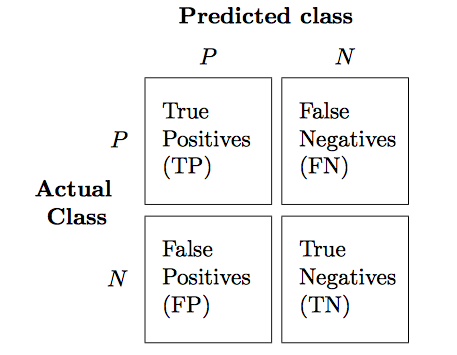

In [3]:
from IPython.display import Image
Image(filename='./images/06_08.png', width=500) 

混合行列は下記のようにとることができる

In [12]:
from sklearn.metrics import confusion_matrix

pipe_svc.fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


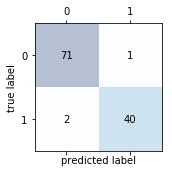

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

# 適合率と再現率を最適化する

誤分類率（ERR）と正解率（ACC）はご分類されるサンプルの個数に関する全体的な情報を提供する<br>
誤分散率は誤った予測の合計を予測の総数で割ったもの、<br>
正解率は正しい予測の合計を予測の総数で割ったものとして計算できる<br>
真陽性率（TPR)と偽陽性率（FPR）は不均衡なクラスの問題に役立つ性能指標である<br>
$ERR=\frac{FP+FN}{FP+FN+TP+TN}$<br>
$ACC=\frac{TP+TN}{FP+FN+TP+TN}=1-ERR$<br>
$FPR=\frac{FP}{N}=\frac{FP}{FP+TN}$<br>
$TPR=\frac{TP}{P}=\frac{TP}{FN+TP}$

適合率（PRE）と再現率（REC)は、TPRとFPrに関する性能指標である。<br>
実際にはRECはTPRと同義語である。<br>
実際にはPREとRECを組み合わせたF1スコアが使われる<br>
$PRE=\frac{TP}{TP+FP}$<br>
$REC=TPR=\frac{TP}{P}=\frac{TP}{FN+TP}$<br>
$F1=2\frac{PRE*REC}{PRE+REC}$

それぞれを実装すると下のようになる。

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


# その他関数

In [5]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [7]:
import pandas as pd
import urllib

try:
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                     '/breast-cancer-wisconsin/wdbc.data', header=None)

except urllib.error.URLError:
    df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book/master/code/'
                     'datasets/wdbc/wdbc.data', header=None)
    
print('rows, columns:', df.shape)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#データを読み込み、テストデータと正解データと分ける
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import cross_val_score
else:
    from sklearn.model_selection import cross_val_score

pipe_svc = Pipeline([('scl', StandardScaler()),
            ('clf', SVC(random_state=1))])